## Heart Disease Prediction Using Decision Tree

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score

### Importing Dataset

In [5]:
df = pd.read_csv("Downloads/heart+disease/processed.cleveland.data",header = None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
header = ["age" , "sex" , "cp" , "trestbps" , "chol" , "fbs" , "restecg" , "thalach" , "exang" , "oldpeak" , "slope" , "ca" , "thal" , "hd" ]

In [9]:
df.columns = header

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Handling Missing Values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [23]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [24]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [25]:
## This above 2 columns have missing data 

In [36]:
# Lets check How many rows have missing data.
len(df[df['ca'] == '?']) + len(df[df['thal'] == '?'])

6

In [38]:
6 / len(df) * 100

1.9801980198019802

In [39]:
# So only 2% of row has missing values . So lets remove them .

In [118]:
df_removed = df[(df['thal'] != '?') & (df['ca'] != '?')]

In [119]:
len(df_removed)

297

In [120]:
df_removed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Handling Categorical Values

In [76]:
# Tree models are not sensitive to the numeric value of categories. 
# So label encoding can be used instead of one hot encoding .
# One hot encoding is space consuming.

In [77]:
# Above dataset has already handled categorical data.

In [ ]:
df_removed['hd'] = df_removed['hd'].apply(lambda x: 1 if x in [1, 2 , 3 , 4] else 0)

In [122]:
df_removed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Lets split data into train and test

In [124]:
X = df_removed.drop(columns = 'hd').values
y = df_removed['hd'].values

In [126]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 50) 

### Lets Build Initial Decision Tree.

In [129]:
model = DecisionTreeClassifier()

In [130]:
model.fit(X_train , y_train)

DecisionTreeClassifier()

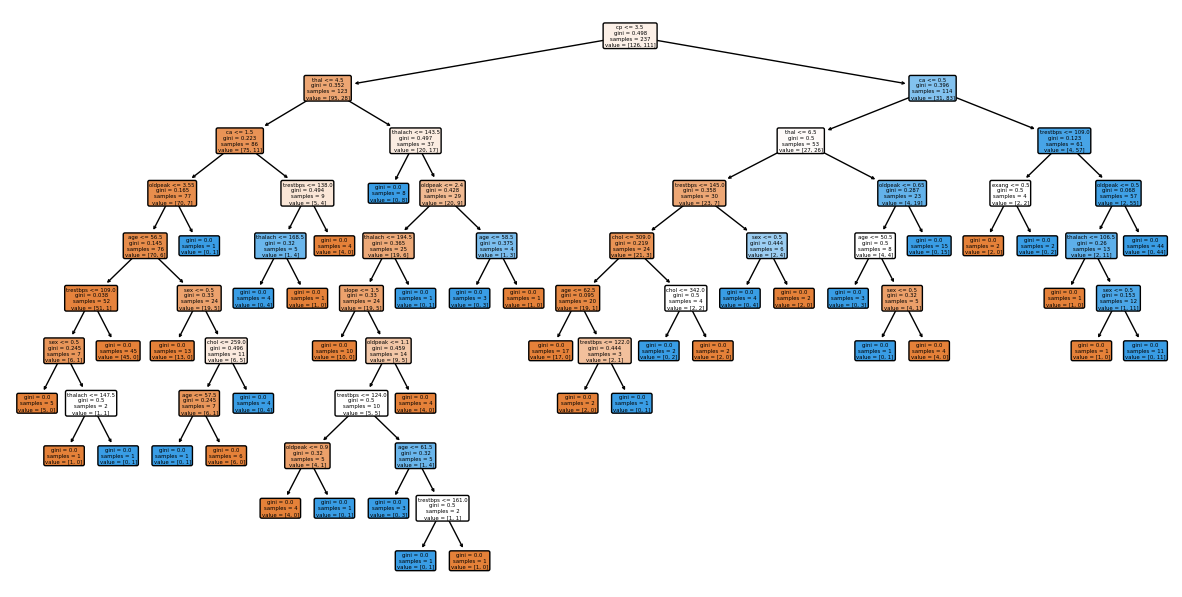

In [134]:
plt.figure(figsize = (15 , 7.5))
plot_tree(model , filled = True , rounded = True , feature_names = df_removed.columns)
plt.show()

In [135]:
# Above Tree is extremmly huge.
# There is very high chance of overfitting.

In [136]:
# Lets check the accuracy of model.

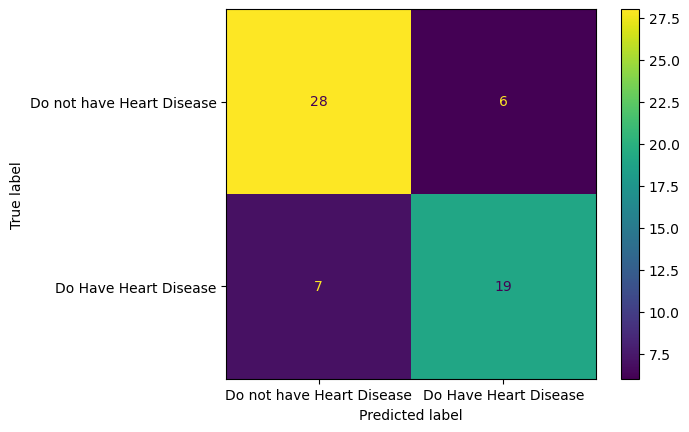

In [141]:
ConfusionMatrixDisplay.from_estimator(model , X_test , y_test , display_labels = ['Do not have Heart Disease' , 'Do Have Heart Disease'] )
plt.show()

In [139]:
model.score(X_test , y_test)

0.7833333333333333

In [143]:
19 / 26

0.7307692307692307

In [145]:
# We can see that 34 people do not have heart disease out of which 84% classified correctly
# We can see that 26 people have heart disease out of which 73% classified correctly
# Overall accuracy of model is 78%.

In [146]:
# We need to minimize the false negative and need to increae the accuracy from 73%. 

### Optimizing the Initial Model

In [147]:
# We will optimize the model by doing post pruning 

In [148]:
# We will do this using CCP algorithm (Cost-Complexity-Pruning)

In [150]:
# In this algorithm  tree is pruned and Tree score is calculated.
# Tree Score = total_gini_impurity + alpha * No. of leaves.
# alpha high -> underfitting.
# alpha low -> overfitting.
# A tree which minimizes the tree score is choosen
# Intensity of pruning is defined by alpha

In [151]:
# So our goal is to find the best alpha which neither overfit nor underfit the X_train and generalise the dataset.

In [152]:
path = model.cost_complexity_pruning_path(X_train , y_train) # This find the transition value of alpha
ccp_alphas = path.ccp_alphas # This extracts those values

In [154]:
# Lets create decision tree for each ccp alpha and find out accuracy.
trees = []
for ccp_alpha in ccp_alphas:
    mod = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha)
    trees.append(mod)

In [155]:
# Lets use cross validation and find the accuracy of each model.
accuracy = []
for mod in trees:
    accur = cross_val_score(mod , X_train , y_train , cv = 5)
    accuracy.append(accur.mean())

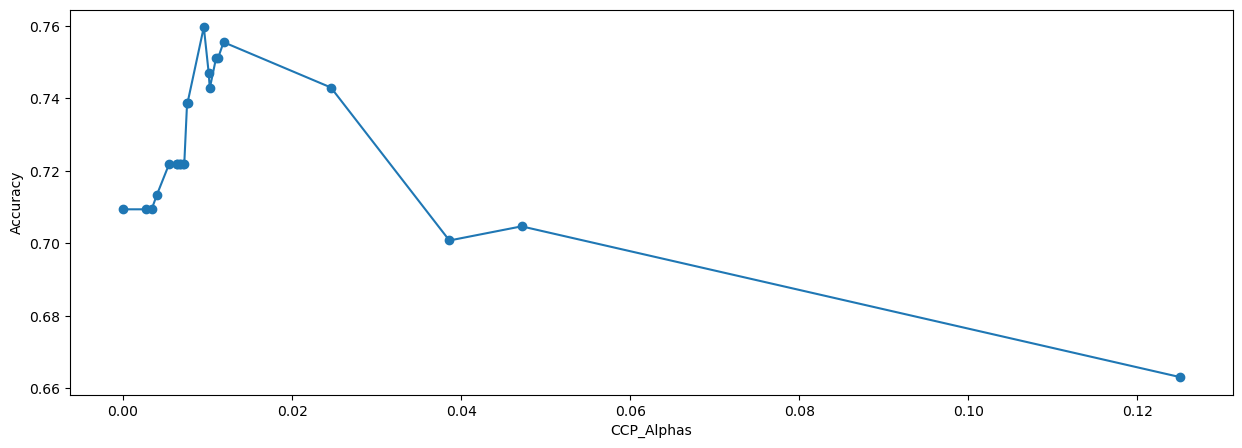

In [163]:
plt.figure(figsize = (15 , 5))
plt.plot(ccp_alphas , accuracy , marker = 'o')
plt.xlabel("CCP_Alphas")
plt.ylabel("Accuracy")
plt.show()

In [161]:
# Lets find the which ccp_alpha gives highest accuracy.
accuracy = np.array(accuracy)
index = np.argmax(accuracy)
best_ccp_alpha = ccp_alphas[index]
print(best_ccp_alpha)

0.009547941509966823


### Building Optimized model

In [164]:
model_pruned = DecisionTreeClassifier(ccp_alpha = best_ccp_alpha)

In [165]:
model_pruned.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.009547941509966823)

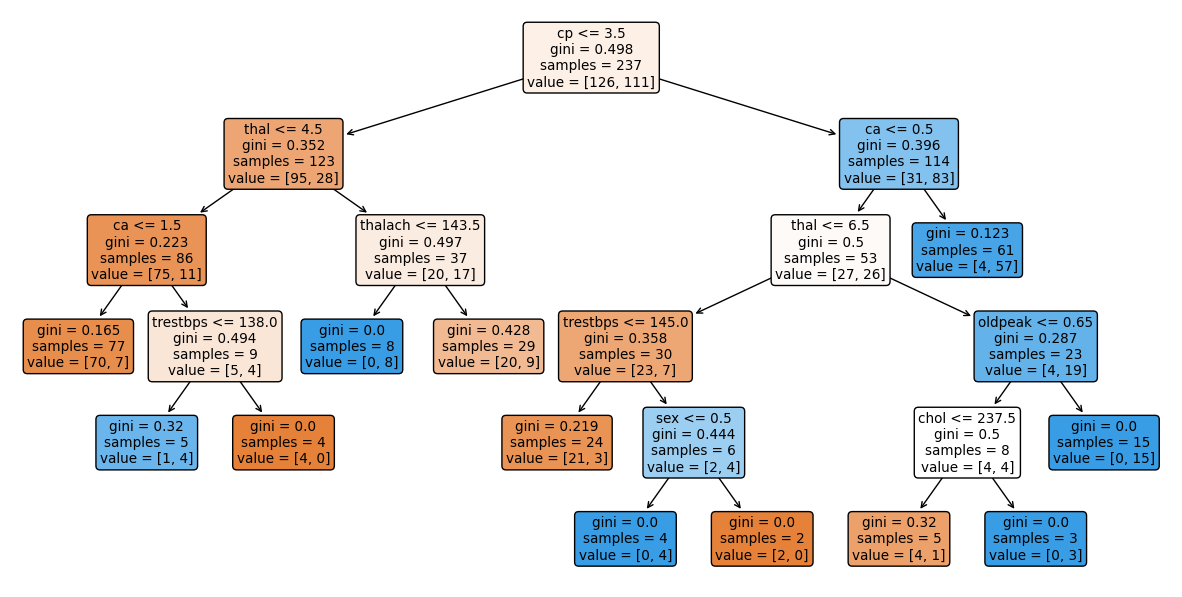

In [167]:
plt.figure(figsize = (15 , 7.5))
plot_tree(model_pruned , filled = True , rounded = True , feature_names = df_removed.columns)
plt.show()

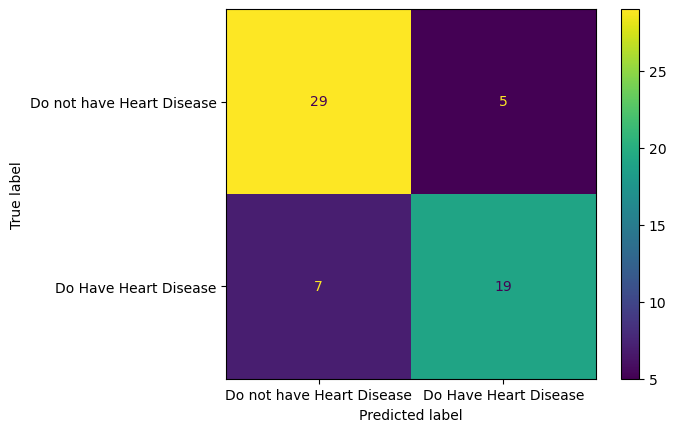

In [168]:
ConfusionMatrixDisplay.from_estimator(model_pruned , X_test , y_test , display_labels = ['Do not have Heart Disease' , 'Do Have Heart Disease'])
plt.show()

In [169]:
model_pruned.score(X_test , y_test)

0.8

In [172]:
# We can see that 34 people do not have heart disease out of which 85% classified correctly improvement of 1%
# We can see that 26 people have heart disease out of which 73% classified correctly
# Overall accuracy of model is 80% improvement of 2%

In [185]:
acc1 = []
acc2 = []
for mod in trees:
    mod.fit(X_train , y_train)
    acc1.append(mod.score(X_train , y_train))
    acc2.append(mod.score(X_test , y_test))

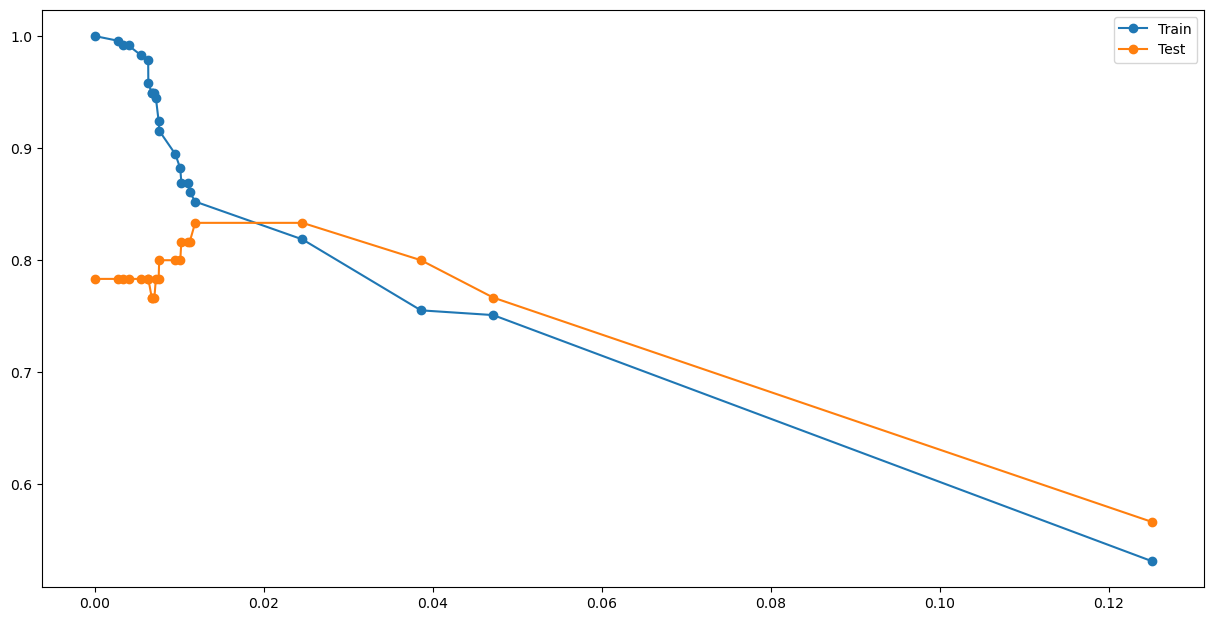

In [191]:
plt.figure(figsize = (15 , 7.5))
plt.plot(ccp_alphas , acc1 , marker = 'o' , label = "Train")
plt.plot(ccp_alphas, acc2 , marker = 'o' , label = "Test")
plt.legend()
plt.show()